# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The data set has 1338 observations; though the charges range from 0 to 60000, the mean is at 13270.  Assuming this is a random sample, it does have a skew but is large enough to derive subsequent simulations from.

Medical Charges Statistics
mean: 13270.422265141257
standard deviation: 12105.484975561605


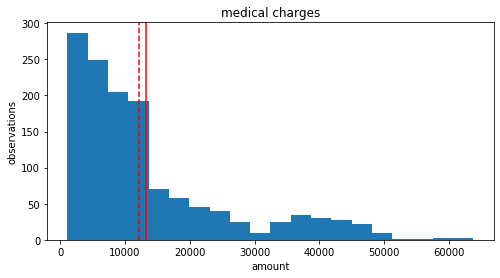

In [4]:
def charges_hist(data):
    charges_mean = np.mean(data)
    charges_std = np.std(data)
    print('Medical Charges Statistics\nmean: {}\nstandard deviation: {}'.format(charges_mean, charges_std))

    _ = plt.figure(figsize=(8,4))
    _ = plt.hist(data, bins=20)
    _ = plt.title('medical charges')
    _ = plt.xlabel('amount')
    _ = plt.ylabel('observations')
    _ = plt.axvline(charges_mean, color='r')
    _ = plt.axvline(charges_std, color='r', linestyle='--')
    
charges_hist(medical.charges)

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ This data can answer the question because the sample size is large enough to be significant. Since there are a large number of observations in the sample, the appropriate frequentist test (between z-score and t-distribution) would be the t-dist.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ Since the administrator is primarily concerned with determining the charge difference in one direction, a one-sided interval is more appropriate. The critical value for t-distribution is 1.646, and a 95% confidence evaluated for the initial sample's mean places the interval above 12725. A 99% confidence is above 12499. 

Simulating 1000 samples of 50 observations from the original sample set brings the 95% confidence interval above 13192, and the 99% confidence interval above 13155.

In [5]:

def charge_sampler(data, n):
    return np.random.choice(data, n)

# user function
def samples_per_range(data, x, y):
    """uses townsfolk_sampler to generate x number of samples for y number of trials"""
    # capture list
    _ = []
    # create x samples for y iterations
    for i in range(y):    
        charge_sample = charge_sampler(data, x)
        sample_mean = np.mean(charge_sample)
        _.append(sample_mean)
    # returned array
    arr = np.array(_)
    
    # plot
    _ = plt.hist(arr, bins=20)
    _ = plt.xlabel('mean of sample amount')
    _ = plt.ylabel('observations')
    _ = plt.title('Distribution of charges in {} simulations of sample size {}'.format(y, x))

    # markers
    # mean
    arr_mean = np.mean(arr)
    _ = plt.axvline(arr_mean, color='r')
    # 1std
    arr_std = np.std(arr, ddof=1)
    std_1_mk1 = arr_mean - arr_std
    _ = plt.axvline(std_1_mk1, color='r', linestyle='--')
    std_1_mk2 = arr_mean + arr_std
    _ = plt.axvline(std_1_mk2, color='r', linestyle='--')
    # 2std
    std_2_mk1 = arr_mean - (2*arr_std)
    _ = plt.axvline(std_2_mk1, color='r', linestyle='-.')
    std_2_mk2 = arr_mean + (2*arr_std)
    _ = plt.axvline(std_2_mk2, color='r', linestyle='-.')
    
    # output statistics
    print('Mean:\np: {}\ns: {}\n\nStandard Deviation:\np: {}\ns: {}'.format(np.mean(data),np.mean(arr),np.std(data)/np.sqrt(x),np.std(arr, ddof=1)))
    
    # return array of capture list
    return arr

def c_interval_mean_t(_sample, c=95, tail=2):
    _df = len(_sample)-1 # degrees of freedom
    _mean = np.mean(_sample) # mean
    _std = np.std(_sample, ddof=1) # sample std
    if tail == 1:
        con = c/100
    elif tail == 2:
        con = 1-((1-(c/100))/2) # convert confidence level to interval input
    cv = t.ppf(con, df=_df) # t-dist critical value
    se = _std/(np.sqrt(len(_sample))) # standard error
    me = cv * se # margin of error
    print('{}% Confidence Interval:\n{}\n{}'.format(c, np.mean(_sample) - me, np.mean(_sample) + me))

Mean:
p: 13270.422265141257
s: 13280.97926038828

Standard Deviation:
p: 1711.9741031542956
s: 1707.2694329220953


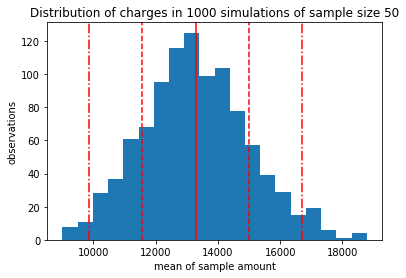

In [6]:
seed(47)
# function call
charge_50_1000 = samples_per_range(medical.charges, 50, 1000)

In [7]:
seed(47)
c_interval_mean_t(medical.charges, c=95, tail=1)
c_interval_mean_t(medical.charges, c=99, tail=1)
t.ppf(.95, len(medical.charges)-1)

95% Confidence Interval:
12725.48718381623
13815.357346466282
99% Confidence Interval:
12499.319744360895
14041.524785921618


1.6459941145571317

In [8]:
seed(47)
c_interval_mean_t(charge_50_1000, c=95, tail=1)
c_interval_mean_t(charge_50_1000, c=99, tail=1)
t.ppf(.95, len(charge_50_1000)-1)

95% Confidence Interval:
13192.093490674988
13369.865030101571
99% Confidence Interval:
13155.18115703384
13406.77736374272


1.646380345427535

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__
Null: People with insurance are not charged a different amount than those without.    
Alt: People with insurance are charged a different amount than those without.    
It is assumed that both groups have the same standard deviation (i.e. using a pooled standard deviation).


__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [9]:
# groups
ins = medical.charges.loc[medical.insuranceclaim == 1] # has insurance
un = medical.charges.loc[medical.insuranceclaim == 0] # is uninsured

# statistics
ins_n = len(ins)
un_n = len(un)
ins_std = np.std(ins, ddof=1)
un_std = np.std(un, ddof=1)
ins_xb = np.mean(ins)
un_xb = np.mean(un)

# pool std
p_std = np.sqrt(((ins_n - 1) * (ins_std**2) + (un_n - 1) * (un_std**2)) / (ins_n + un_n - 2))

In [10]:
# test statistic (t)
t_val = (ins_xb - un_xb) / (p_std*np.sqrt((1/ins_n) + (1/un_n)))
t_val

11.89329903087671

In [11]:
# probability (p-value)
p = (1 - t(ins_n + un_n - 1).cdf(t_val)) * 2
p

0.0

In [12]:
# using scipy.stats ttest_ind
from scipy.stats import ttest_ind
t_val2, p2 = ttest_ind(ins, un)
print(t_val2, p2)

11.893299030876712 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [13]:
t_val3, p3 = ttest_ind(ins, un, equal_var=False)
print(t_val3, p3)

13.298031957975649 1.1105103216309125e-37


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Z-tests are not recommended when the population variance is unknown and when the sample size is not large (n < 30). The wider utility of the t-test in computing makes the z-test redundant.

In [14]:
import scipy.stats
print(scipy.stats.__doc__)


.. _statsrefmanual:

Statistical functions (:mod:`scipy.stats`)

.. currentmodule:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete
   rv_histogram

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   argus             -- Argus
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr (Type III)
   burr12            -- Burr (Type XII)
   cauchy            -- Cauchy
   chi               -- Chi
   chi2              -- Chi-squared
   cosine            -- Cosine
   crystalball       -- Crystalball
   dgamma            -- Double Gamma
 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test